#               Investigate a Dataset (Medical Appointment No Shows)

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  Data Wrangling

In [382]:
NoShow = pd.read_csv('medical_appointments.csv')


In [383]:
# Display the column names for reference
print(NoShow.columns,'\n')


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object') 



In [384]:
# Generate descriptive statistics to understand the dataset
NoShow.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [385]:
# Display the dataset for initial examination
print(NoShow,'\n')


           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841190e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572130e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596270e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557660e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213490e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775120e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM D

In [386]:
# Check for missing values in the dataset
print(NoShow.isnull().sum()) # pd.isna(NoShow).sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [387]:
# Get detailed information about the dataset
NoShow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [388]:
# Check for duplicated records in the dataset

# Stage 1: Comprehensive check
# Count the number of duplicates present in the dataset
print("Number of duplicate records:", sum(NoShow.duplicated()), '\n')

Number of duplicate records: 0 



In [389]:
# Define the columns to be checked for duplicates
# Stage 2: Focused check
columns_to_check = ['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'No-show']

# Verify if excluding the 'Gender' column from 'columns_to_check' impacts the results
# columns_to_check = ['PatientId', 'ScheduledDay', 'AppointmentDay', 'No-show']
# No significant impact observed

# Identify and gather duplicated records based on the specified columns
duplicated_values = NoShow.duplicated(subset=columns_to_check)
duplicated_rows = NoShow[duplicated_values]

# Count the number of completely duplicated rows
print("Number of completely duplicated rows:", duplicated_rows['PatientId'].count(), '\n')

# Display the column names for reference
print(NoShow.columns,'\n')

Number of completely duplicated rows: 1305 

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object') 



In [390]:
# Analyze the age distribution within the dataset
print("Minimum Age:", NoShow.Age.min(), '\n')
print("Maximum Age:", NoShow.Age.max(), '\n')


Minimum Age: -1 

Maximum Age: 115 



## Data Cleaning

### 1) Date

In [391]:
# Ensure that dates are in the proper date format
NoShow['ScheduledDay'] = pd.to_datetime(NoShow.ScheduledDay)
NoShow['AppointmentDay'] = pd.to_datetime(NoShow.AppointmentDay)

# Verify dataset information after performing data cleaning
NoShow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

### 2) Age

In [392]:
# Age values cannot be equal to or less than 0
# Replace invalid age values with the mean age
mean_age = NoShow['Age'].mean()
NoShow.loc[NoShow['Age'] <= 0, 'Age'] = mean_age


In [393]:
# Verify the age range after replacing invalid values
print("Minimum Age:", NoShow.Age.min(), '\n')
print("Maximum Age:", NoShow.Age.max(), '\n')

Minimum Age: 1.0 

Maximum Age: 115.0 



### 3) Duplicates

In [394]:
# Drop the completely duplicated rows from the dataset
# NoShow.drop_duplicates(subset=columns_to_check, inplace=True)

### 4) Adjustments

In [395]:
# Create a new column 'Showing Up' and encode 'Yes' as 1 and 'No' as 0
NoShow['Showing Up'] = NoShow['No-show'].replace({'Yes': 1, 'No': 0})

# Replace 1 with 'No' and 0 with 'Yes' in the 'Showing Up' column for clarity
NoShow['Showing Up'] = NoShow['Showing Up'].replace({1: 'No', 0: 'Yes'})

# Convert no show data to 0 and 1 instead of 'yes' and 'no' so we can handle using plot or goupby

NoShow.loc[NoShow['No-show'] == 'Yes', 'No-show'] = 1
NoShow.loc[NoShow['No-show'] == 'No', 'No-show'] = 0

# create a mask for people who came
showed = NoShow['No-show'] == 0
not_showed = NoShow['No-show'] == 1
NoShow['showed'] = showed
NoShow['not_showed'] = not_showed

# Display 'No-show' and 'Showing Up'
print(NoShow[['No-show', 'Showing Up','showed', 'not_showed']].head(), '\n')


  No-show Showing Up  showed  not_showed
0       0        Yes    True       False
1       0        Yes    True       False
2       0        Yes    True       False
3       0        Yes    True       False
4       0        Yes    True       False 



##  Data Exploration


### Proportion of Patients Showing Up vs Not Showing Up

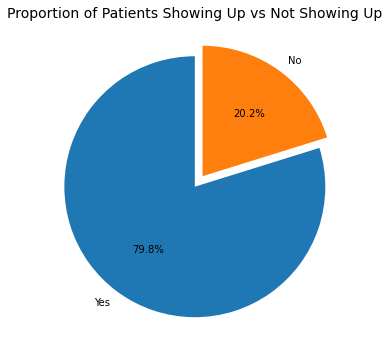

In [396]:
# Calculate the count and normalized count of each value in 'Showing Up'
showing_up_counts = NoShow['Showing Up'].value_counts()  # Count of each value
normalized_counts = showing_up_counts / len(NoShow)  # Calculate the normalized count

# Set up the figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))

explode = (0, 0.1)  # Explode 

# Plot the pie chart
colors = ['#1f77b4', '#ff7f0e']
plt.pie(showing_up_counts.values, labels=showing_up_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, explode = explode)

# Customize the plot aesthetics
ax.set_title('Proportion of Patients Showing Up vs Not Showing Up', fontsize=14)

plt.show()  # Display the plot


### What are the most feature that matter the most?
### Plot the relationship between each feature and showing up


### 1- Age

In [397]:
# Define age categories
age_categories = {
    (0, 2): 'Baby',
    (3, 12): 'Child',
    (13, 19): 'Teen',
    (20, 59): 'Adult',
    (60, np.inf): 'Elderly'
}

# Create a new column 'Age Category' based on the age categories
NoShow['Age Category'] = pd.cut(NoShow['Age'], bins=[0, 2, 12, 19, 59, np.inf], labels=['1-2 Baby', '3-12 Child', '13-19 Teen', '20-59 Adult', '60+ Elderly'])


NoShow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Showing Up,showed,not_showed,Age Category
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0,Yes,True,False,60+ Elderly
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0,Yes,True,False,20-59 Adult
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,0,Yes,True,False,60+ Elderly
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Yes,True,False,3-12 Child
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,0,Yes,True,False,20-59 Adult


Showing Up
No     35.379533
Yes    39.009861
Name: Age, dtype: float64 


20-59 Adult    62482
60+ Elderly    21173
3-12 Child     13606
13-19 Teen      9375
1-2 Baby        3891
Name: Age Category, dtype: int64 


20-59 Adult    0.565310
60+ Elderly    0.191564
3-12 Child     0.123101
13-19 Teen     0.084821
1-2 Baby       0.035204
Name: Age Category, dtype: float64 


20-59 Adult    56.530983
60+ Elderly    19.156405
3-12 Child     12.310114
13-19 Teen      8.482090
1-2 Baby        3.520407
Name: Age Category, dtype: float64 




Text(0.5, 1.0, 'Percentage Count of Each Age Category')

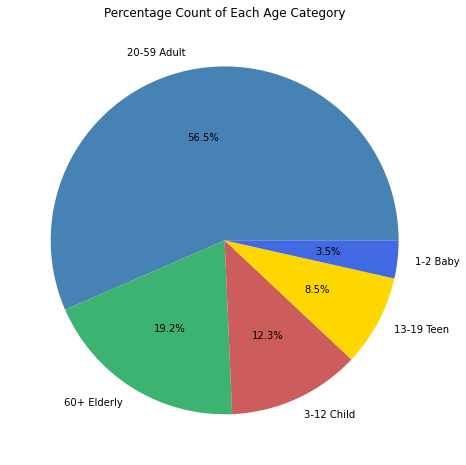

In [398]:
# Group by a Age and calculate the average of people who showed up
avg_showing_up = NoShow.groupby('Showing Up')['Age'].mean()

print(avg_showing_up,'\n\n')


# Calculate the count, normalized count and percentage count of each value in 'Age Category'
Age_counts = NoShow['Age Category'].value_counts()  # Count of each value
normalized_Age_counts = Age_counts / len(NoShow)  # Calculate the normalized count
percentage_counts = (Age_counts / len(NoShow)) * 100  # Calculate the percentage count
percentage_counts
print(Age_counts,'\n\n')
print(normalized_Age_counts,'\n\n')
print(percentage_counts,'\n\n')


# Define colors for each category
colors = ['steelblue', 'mediumseagreen', 'indianred', 'gold', 'royalblue', 'darkorange']


# Plotting the percentage counts as a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(percentage_counts, labels=percentage_counts.index, colors=colors, autopct='%1.1f%%')
ax.set_title('Percentage Count of Each Age Category')

Text(0, 0.5, 'Number of patients')

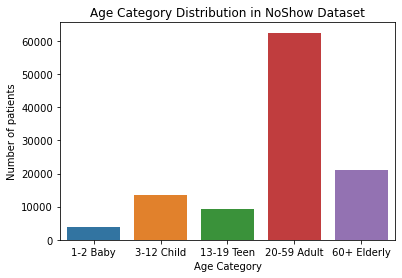

In [399]:
# Plot the relationship between age and showing up
sns.countplot(x="Age Category", data=NoShow)
plt.title("Age Category Distribution in NoShow Dataset")
plt.ylabel("Number of patients")


Text(0.5, 1.0, 'Relationship between age and showing up')

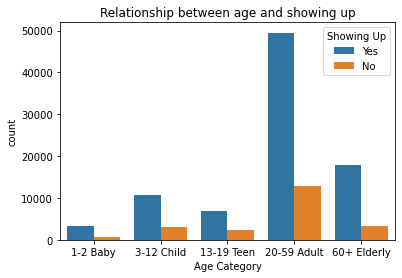

In [400]:
# Plot the relationship between age and showing up
sns.countplot(x="Age Category", hue="Showing Up", data=NoShow)
plt.title("Relationship between age and showing up")


### 2- Gender

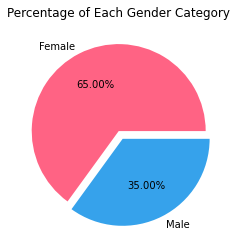

F    71840
M    38687
Name: Gender, dtype: int64 




In [401]:
# Calculate the count and normalized count of each value in 'Gender'
Gender_counts = NoShow['Gender'].value_counts()  # Count of each value
normalized_Gender_counts = Gender_counts / len(NoShow)  # Calculate the normalized count
percentage_Gender_counts = (Gender_counts / len(NoShow)) * 100  # Calculate the percentage count

G_color = ['#FF6384', '#36A2EB']
G_label = ['Female','Male']
# Create a pie plot for percentage counts
plt.pie(percentage_Gender_counts, labels=G_label, colors= G_color,explode=explode , autopct='%.2f%%')
plt.title('Percentage of Each Gender Category')

plt.show()

print(Gender_counts,'\n\n')



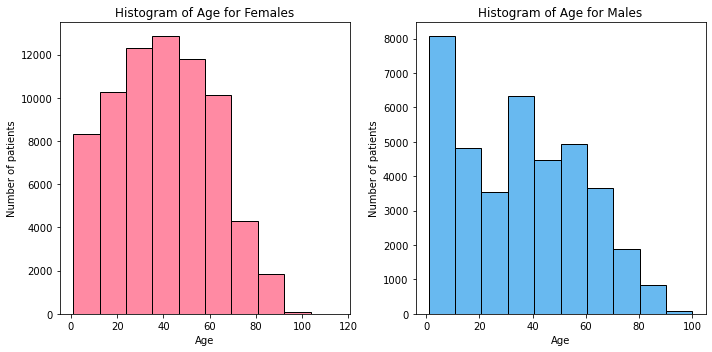

In [402]:
# Separate histograms of Age for each Gender
female_data = NoShow[NoShow['Gender'] == 'F']
male_data = NoShow[NoShow['Gender'] == 'M']

plt.figure(figsize=(10, 5))

# Histogram for Female Gender
plt.subplot(1, 2, 1)
sns.histplot(data=female_data, x='Age', bins=10, color=G_color[0])
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Histogram of Age for Females')

# Histogram for Male Gender
plt.subplot(1, 2, 2)
sns.histplot(data=male_data, x='Age', bins=10, color=G_color[1])
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Histogram of Age for Males')

plt.tight_layout()
plt.show()


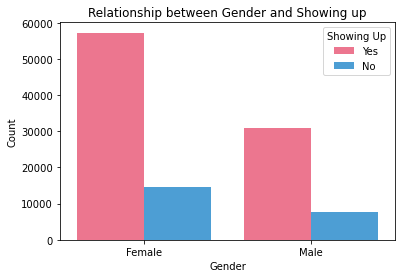

In [403]:
# Plot the relationship between gender and showing up
sns.countplot(x="Gender", hue="Showing Up", data=NoShow, palette=G_color)
plt.title("Relationship between Gender and Showing up")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0, 1], G_label)

plt.show()

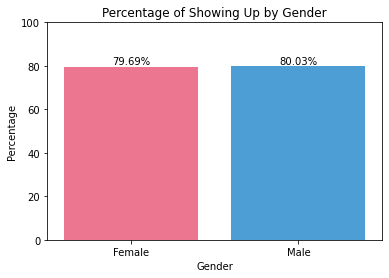

In [404]:
# Calculate the percentage of females showing up
female_showing_percentage = (NoShow[NoShow['Gender'] == 'F']['showed'].sum() / NoShow[NoShow['Gender'] == 'F']['Gender'].count()) * 100

# Calculate the percentage of males showing up
male_showing_percentage = (NoShow[NoShow['Gender'] == 'M']['showed'].sum() / NoShow[NoShow['Gender'] == 'M']['Gender'].count()) * 100

# Create a bar plot
sns.barplot(x=G_labels, y=[female_showing_percentage, male_showing_percentage], palette=G_color)
plt.title('Percentage of Showing Up by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Add text labels with the actual percentages
for i, percent in enumerate([female_showing_percentage, male_showing_percentage]):
    plt.text(i, percent, "{:.2f}%".format(percent), ha='center', va='bottom')

plt.show()


### 3- Alcoholism

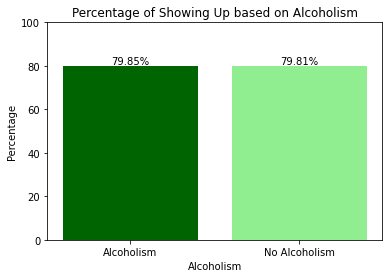

In [405]:
# Calculate the percentage of patients with Alcoholism who showed up
alcoholism_showing_percentage = (NoShow[NoShow['Alcoholism'] == 1]['showed'].sum() / NoShow[NoShow['Alcoholism'] == 1]['Alcoholism'].count()) * 100

# Calculate the percentage of patients without Alcoholism who showed up
non_alcoholism_showing_percentage = (NoShow[NoShow['Alcoholism'] == 0]['showed'].sum() / NoShow[NoShow['Alcoholism'] == 0]['Alcoholism'].count()) * 100


A_color = ['#006400', '#90EE90']
A_label = ["Alcoholism", "No Alcoholism"]

# Create a bar plot
plt.bar(A_label, [alcoholism_showing_percentage, non_alcoholism_showing_percentage], color=A_color)
plt.title('Percentage of Showing Up based on Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Percentage')
plt.ylim([0, 100])

# Add text labels with the actual percentages
for i, percent in enumerate([alcoholism_showing_percentage, non_alcoholism_showing_percentage]):
    plt.text(i, percent, "{:.2f}%".format(percent), ha='center', va='bottom')

plt.show()


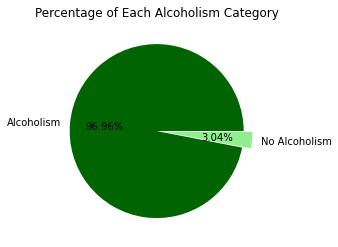

0    107167
1      3360
Name: Alcoholism, dtype: int64


In [406]:
# Calculate the count and normalized count of each value in 'Alcoholism'
Alcoholism_counts = NoShow['Alcoholism'].value_counts()  # Count of each value
normalized_Alcoholism_counts = Alcoholism_counts / len(NoShow)  # Calculate the normalized count
percentage_Alcoholism_counts = (Alcoholism_counts / len(NoShow)) * 100  # Calculate the percentage count

# Create a pie plot for percentage counts
plt.pie(percentage_Alcoholism_counts, labels=A_label, colors= A_color, explode=explode , autopct='%.2f%%')
plt.title('Percentage of Each Alcoholism Category')

plt.show()

print(Alcoholism_counts)


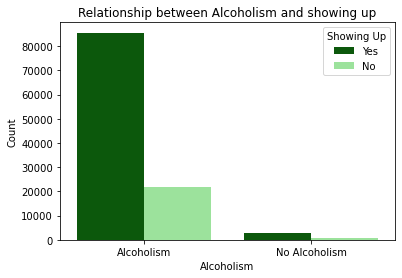

In [407]:
# Plot the relationship between Alcoholism and showing up
sns.countplot(x="Alcoholism", hue="Showing Up", data=NoShow, palette=A_color )
plt.title("Relationship between Alcoholism and showing up")
plt.xlabel("Alcoholism")
plt.ylabel("Count")
plt.xticks([0, 1], A_label)

plt.show()



### 4- Hipertension

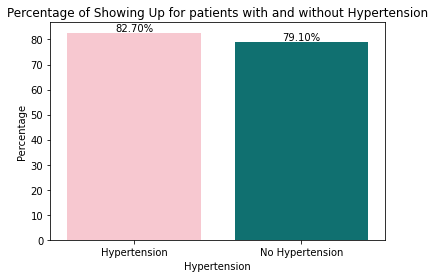

In [408]:
# Calculate the percentage of patients with hypertension who showed up
hypertension_showing_percentage = (NoShow[NoShow['Hipertension'] == 1]['showed'].sum() / NoShow[NoShow['Hipertension'] == 1]['Hipertension'].count()) * 100

# Calculate the percentage of patients without hypertension who showed up
non_hypertension_showing_percentage = (NoShow[NoShow['Hipertension'] == 0]['showed'].sum() / NoShow[NoShow['Hipertension'] == 0]['Hipertension'].count()) * 100

H_color =  ["#FFC0CB", "#008080"]
H_label = ["Hypertension", "No Hypertension"]

# Create a bar plot
sns.barplot(x=H_label, y=[hypertension_showing_percentage, non_hypertension_showing_percentage], palette=H_color)
plt.title("Percentage of Showing Up for patients with and without Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Percentage")

# Add text labels with the actual percentages
plt.text(0, hypertension_showing_percentage, "{:.2f}%".format(hypertension_showing_percentage), ha='center', va='bottom')
plt.text(1, non_hypertension_showing_percentage, "{:.2f}%".format(non_hypertension_showing_percentage), ha='center', va='bottom')

plt.show()

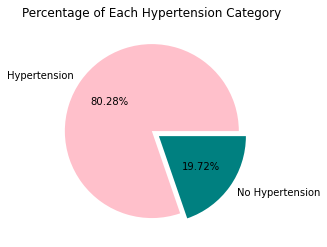

0    88726
1    21801
Name: Hipertension, dtype: int64


In [409]:
# Calculate the count and normalized count of each value in 'Hypertension'
hypertension_counts = NoShow['Hipertension'].value_counts()  # Count of each value
normalized_hypertension_counts = hypertension_counts / len(NoShow)  # Calculate the normalized count
percentage_hypertension_counts = (hypertension_counts / len(NoShow)) * 100  # Calculate the percentage count

# Create a pie plot for percentage counts
plt.pie(percentage_hypertension_counts, labels= H_label ,colors=H_color, explode=explode , autopct='%.2f%%')
plt.title('Percentage of Each Hypertension Category')
 
plt.show()

print(hypertension_counts)


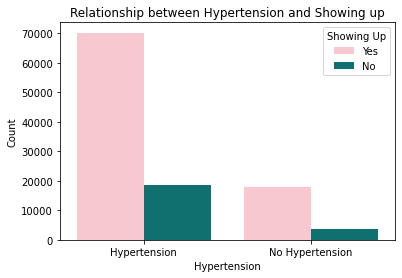

In [410]:
# Plot the relationship between Hypertension and showing up
sns.countplot(x="Hipertension", hue="Showing Up", data=NoShow, palette=H_color)
plt.title("Relationship between Hypertension and Showing up")
plt.xlabel("Hypertension")
plt.ylabel("Count")
plt.xticks([0, 1], H_label)

plt.show()


### 5- Scholarship

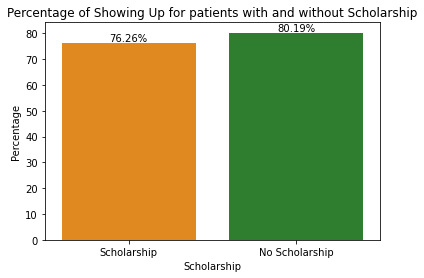

In [411]:
# Calculate the percentage of patients with Scholarship who showed up
scholarship_showing_percentage = (NoShow[NoShow['Scholarship'] == 1]['showed'].sum() / NoShow[NoShow['Scholarship'] == 1]['Scholarship'].count()) * 100

# Calculate the percentage of patients without Scholarship who showed up
non_scholarship_showing_percentage = (NoShow[NoShow['Scholarship'] == 0]['showed'].sum() / NoShow[NoShow['Scholarship'] == 0]['Scholarship'].count()) * 100

# Create a bar plot
S_labels = ['Scholarship', 'No Scholarship']
percentages = [scholarship_showing_percentage, non_scholarship_showing_percentage]
S_colors =['#FF8C00', '#228B22']
sns.barplot(x=S_labels, y=percentages, palette=S_colors)

# Set the title and labels
plt.title('Percentage of Showing Up for patients with and without Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Percentage')

# Add text labels with the actual percentages
for i, percent in enumerate(percentages):
    plt.text(i, percent, "{:.2f}%".format(percent), ha='center', va='bottom')

plt.show()

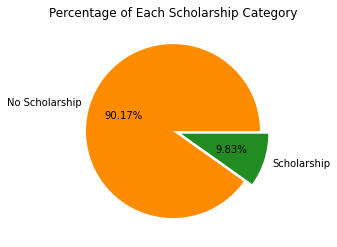

0    99666
1    10861
Name: Scholarship, dtype: int64


In [412]:
# Calculate the count and normalized count of each value in 'Scholarship'
scholarship_counts = NoShow['Scholarship'].value_counts()  # Count of each value
normalized_scholarship_counts = scholarship_counts / len(NoShow)  # Calculate the normalized count
percentage_scholarship_counts = (scholarship_counts / len(NoShow)) * 100  # Calculate the percentage count

# Create a pie plot for percentage counts
S_labels = ['No Scholarship', 'Scholarship']


plt.pie(percentage_scholarship_counts, labels=S_labels, colors=S_colors, explode=explode, autopct='%.2f%%')
plt.title('Percentage of Each Scholarship Category')

plt.show()

print(scholarship_counts)


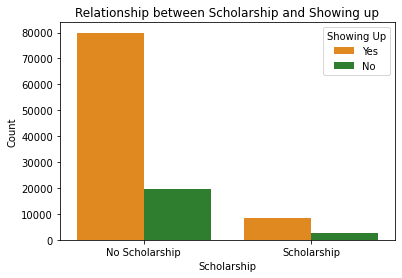

In [413]:
# Plot the relationship between Scholarship and Showing up
sns.countplot(x="Scholarship", hue="Showing Up", data=NoShow, palette=S_colors)
plt.title("Relationship between Scholarship and Showing up")
plt.xlabel("Scholarship")
plt.ylabel("Count")

# Update x-labels
plt.xticks([0, 1], ["No Scholarship", "Scholarship"])

plt.show()

### 6- Diabetes

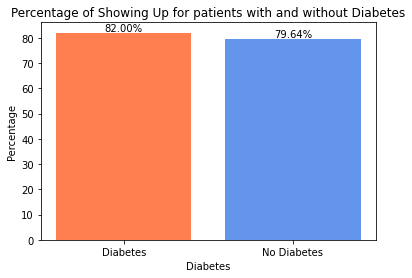

In [414]:
# Calculate the percentage of patients with Diabetes who showed up
diabetes_showing_percentage = (NoShow[NoShow['Diabetes'] == 1]['showed'].sum() / NoShow[NoShow['Diabetes'] == 1]['Diabetes'].count()) * 100

# Calculate the percentage of patients without Diabetes who showed up
non_diabetes_showing_percentage = (NoShow[NoShow['Diabetes'] == 0]['showed'].sum() / NoShow[NoShow['Diabetes'] == 0]['Diabetes'].count()) * 100

# Create bar plot
labels = ['Diabetes', 'No Diabetes']
percentages = [diabetes_showing_percentage, non_diabetes_showing_percentage]
colors = ['#FF7F50', '#6495ED']  # Specify colors

x_pos = np.arange(len(labels))

plt.bar(x_pos, percentages, color=colors, align='center')
plt.xticks(x_pos, labels)
plt.title('Percentage of Showing Up for patients with and without Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Percentage')

# Add text labels with the actual percentages
for i, percent in enumerate(percentages):
    plt.text(i, percent, "{:.2f}%".format(percent), ha='center', va='bottom')

plt.show()


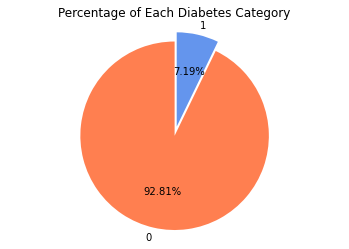

0    102584
1      7943
Name: Diabetes, dtype: int64


In [415]:
# Calculate the count and percentage of each value in 'Diabetes'
diabetes_counts = NoShow['Diabetes'].value_counts()  # Count of each value
percentage_diabetes_counts = (diabetes_counts / len(NoShow)) * 100  # Calculate the percentage count

# Create a pie plot
labels = diabetes_counts.index
sizes = diabetes_counts.values
colors = ['#FF7F50', '#6495ED']  # Specify colors




plt.pie(sizes, labels=labels, colors=colors, autopct='%.2f%%', explode=explode, startangle=90)
plt.title('Percentage of Each Diabetes Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

print(diabetes_counts)


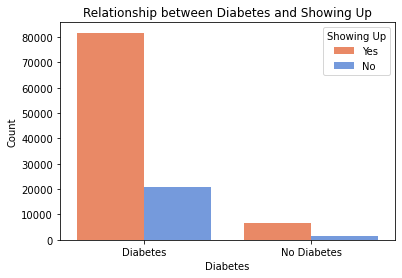

In [416]:
# Plot the relationship between Diabetes and Showing up
sns.countplot(x="Diabetes", hue="Showing Up", data=NoShow, palette=colors)
# Set the title and labels
plt.title("Relationship between Diabetes and Showing Up")
plt.xlabel("Diabetes")
plt.ylabel("Count")

# Customize the x-labels
plt.xticks(ticks=[0, 1], labels=d_labels)

plt.show()


### 7- Handicap

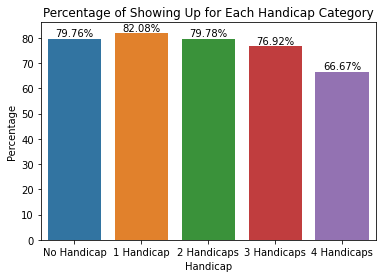

In [417]:
# Calculate the percentage of patients with one Handicap who showed up
handicap1_showing_percentage = (NoShow[NoShow['Handcap'] == 1]['showed'].sum() / NoShow[NoShow['Handcap'] == 1]['Handcap'].count()) * 100

# Calculate the percentage of patients with two Handicaps who showed up
handicap2_showing_percentage = (NoShow[NoShow['Handcap'] == 2]['showed'].sum() / NoShow[NoShow['Handcap'] == 2]['Handcap'].count()) * 100

# Calculate the percentage of patients with three Handicaps who showed up
handicap3_showing_percentage = (NoShow[NoShow['Handcap'] == 3]['showed'].sum() / NoShow[NoShow['Handcap'] == 3]['Handcap'].count()) * 100

# Calculate the percentage of patients with four Handicaps who showed up
handicap4_showing_percentage = (NoShow[NoShow['Handcap'] == 4]['showed'].sum() / NoShow[NoShow['Handcap'] == 4]['Handcap'].count()) * 100

# Calculate the percentage of patients without Handicap who showed up
non_handicap_showing_percentage = (NoShow[NoShow['Handcap'] == 0]['showed'].sum() / NoShow[NoShow['Handcap'] == 0]['Handcap'].count()) * 100

# Create a bar plot for the percentages
handicap_labels = ['No Handicap', '1 Handicap', '2 Handicaps', '3 Handicaps', '4 Handicaps']
showing_percentages = [non_handicap_showing_percentage, handicap1_showing_percentage, handicap2_showing_percentage,
                       handicap3_showing_percentage, handicap4_showing_percentage]

sns.barplot(x=handicap_labels, y=showing_percentages)
plt.title('Percentage of Showing Up for Each Handicap Category')
plt.xlabel('Handicap')
plt.ylabel('Percentage')

# Add text labels with the actual percentages
for i, percent in enumerate(showing_percentages):
    plt.text(i, percent, "{:.2f}%".format(percent), ha='center', va='bottom')

plt.show()



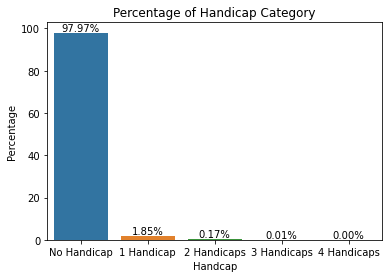

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64


In [418]:

# Calculate the count and normalized count of each value in 'Handicap'
handicap_counts = NoShow['Handcap'].value_counts()  # Count of each value
normalized_handicap_counts = handicap_counts / len(NoShow)  # Calculate the normalized count
percentage_handicap_counts = (handicap_counts / len(NoShow)) * 100  # Calculate the percentage count

# Create a bar plot for percentage counts
sns.barplot(x=handicap_labels, y=percentage_handicap_counts)
plt.title('Percentage of Handicap Category')
plt.xlabel('Handcap')
plt.ylabel('Percentage')

# Add text labels with the actual percentages
for i, percent in enumerate(percentage_handicap_counts):
    plt.text(i, percent, "{:.2f}%".format(percent), ha='center', va='bottom')

plt.show()

handicap_counts = NoShow['Handcap'].value_counts()
print(handicap_counts)

### 8- SMS

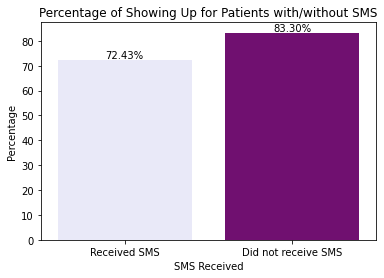

In [419]:
# Calculate the percentage of patients who received an SMS and showed up
sms_received_showing_percentage = (NoShow[NoShow['SMS_received'] == 1]['showed'].sum() / NoShow[NoShow['SMS_received'] == 1]['SMS_received'].count()) * 100

# Calculate the percentage of patients who did not receive an SMS and showed up
sms_not_received_showing_percentage = (NoShow[NoShow['SMS_received'] == 0]['showed'].sum() / NoShow[NoShow['SMS_received'] == 0]['SMS_received'].count()) * 100

# Create a bar plot for the percentages
sms_labels = ['Received SMS', 'Did not receive SMS']
sms_color = ['#E6E6FA', '#800080']
showing_percentages = [sms_received_showing_percentage, sms_not_received_showing_percentage]

sns.barplot(x=sms_labels, y=showing_percentages, palette=sms_color)

# Add text labels with the actual percentages
for i, percent in enumerate(showing_percentages):
    plt.text(i, percent, "{:.2f}%".format(percent), ha='center', va='bottom')

# Customize the plot aesthetics
plt.title('Percentage of Showing Up for Patients with/without SMS')
plt.xlabel('SMS Received')
plt.ylabel('Percentage')

plt.show()

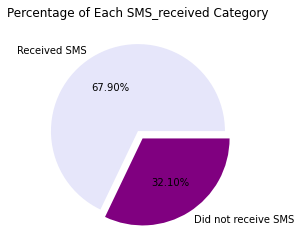

0    75045
1    35482
Name: SMS_received, dtype: int64


In [420]:
# Calculate the count, normalized count, and percentage count of each value in 'SMS_received'
sms_received_counts = NoShow['SMS_received'].value_counts()  # Count of each value
normalized_sms_received_counts = sms_received_counts / len(NoShow)  # Calculate the normalized count
percentage_sms_received_counts = (sms_received_counts / len(NoShow)) * 100  # Calculate the percentage count

# Create a pie chart for the percentage counts


plt.pie(percentage_sms_received_counts, labels=sms_labels, autopct='%.2f%%', colors=sms_color ,explode=explode)
plt.title('Percentage of Each SMS_received Category')

plt.show()

print(sms_received_counts)

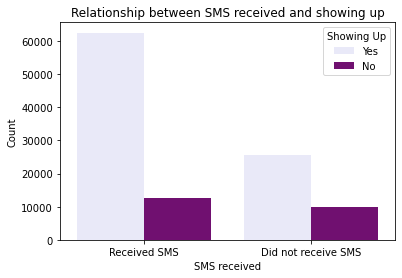

In [421]:
# Plot the relationship between SMS_received and Showing up
sns.countplot(x="SMS_received", hue="Showing Up", data=NoShow , palette=sms_color)
plt.title("Relationship between SMS received and showing up")
plt.xlabel("SMS received")
plt.ylabel("Count")



# Set the x-axis labels
plt.xticks([0, 1], sms_labels)

plt.show()